# 資料匯入

In [42]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5") #也可load sklearn內建iris datasets
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
X = df.drop('屬種',axis=1)
y = df['屬種']

### 未經過處理的KNN訓練

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.82      0.69      0.75        13
 Iris-virginica       0.67      0.80      0.73        10

       accuracy                           0.87        45
      macro avg       0.83      0.83      0.83        45
   weighted avg       0.87      0.87      0.87        45

[[22  0  0]
 [ 0  9  4]
 [ 0  2  8]]


In [45]:
#查看特徵之間的相關性
#用來確認是否值得執行PCA
X.corr()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
花萼長度,1.000000,-0.109369,0.871754,0.817954
花萼寬度,-0.109369,1.000000,-0.420516,-0.356544
花瓣長度,0.871754,-0.420516,1.000000,0.962757
花瓣寬度,0.817954,-0.356544,0.962757,1.000000


# PCA (n=4)
雖說轉換完維度仍為4，但已經有效的可以降低各類特徵的相關性

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)



In [47]:
#經過主成分分析
#可以發現每個特徵之間的相關性都很低
pd.DataFrame(X).corr()

,0,1,2,3
0,1.000000e+00,1.110325e-15,5.213422e-16,-3.121160e-16
1,1.110325e-15,1.000000e+00,-7.820157e-16,6.836976e-16
2,5.213422e-16,-7.820157e-16,1.000000e+00,5.151133e-16
3,-3.121160e-16,6.836976e-16,5.151133e-16,1.000000e+00


### 解釋共變異數比率
### 代表的是 : 該特徵對於描繪整個資料的雛形所佔的重要性

In [48]:
#可以發現第一個特徵其實就已經佔了92.4%的變異數比率，換句話說，用四個特徵個只用第一個去做預測結果應該差不多
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

### 把所有變異率會等於1

In [49]:
def accumulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

In [50]:
p_accu = accumulate(pca.explained_variance_ratio_)
p_accu

[0.9246162071742684, 0.9776317750248034, 0.9948169145498101, 1.0]

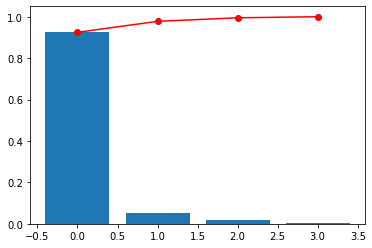

In [51]:
y1 = pca.explained_variance_ratio_
y2 = accumulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x, y2, 'r-o')

plt.show()

# PCA (n=2)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
%matplotlib inline

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

X

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [53]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [54]:
pd.DataFrame(X).corr()

,0,1
0,1.000000e+00,1.159304e-15
1,1.159304e-15,1.000000e+00


In [55]:
from sklearn.preprocessing import LabelEncoder
# 把類別轉成0,1,2，散佈圖上色用
le = LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
y_label = le.transform(y)

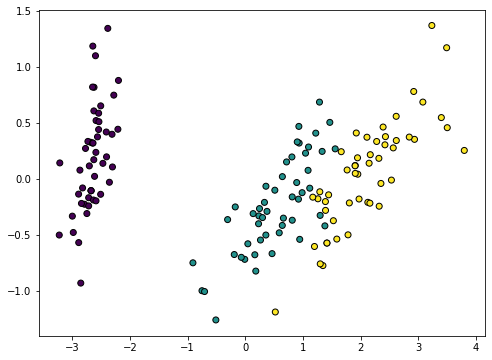

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_label,  edgecolor='k')
plt.show()

# 經過PCA-KNN

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 準確度 & 混淆矩陣

In [60]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 14  0]
 [ 0  0 12]]
